In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split #representing as a fuction
from sklearn.preprocessing import StandardScaler #representing as a classes in pythom
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Consider the data 0= setosa 1=versicolor 2=virginica
#you used r to read the whole file. Without r '/' would have been considered as breakline 
iris_data = pd.read_csv(r"C:\Users\karti\Downloads\iris.csv")

In [20]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [23]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
#to only include object datatype
iris_data.describe(include = 'int64')

,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [26]:
#handling missing values 
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [27]:
#to fill missinf values
#   iris_datd.fillna(iris_data.sepalwidthCm.mean(), inplace=True)

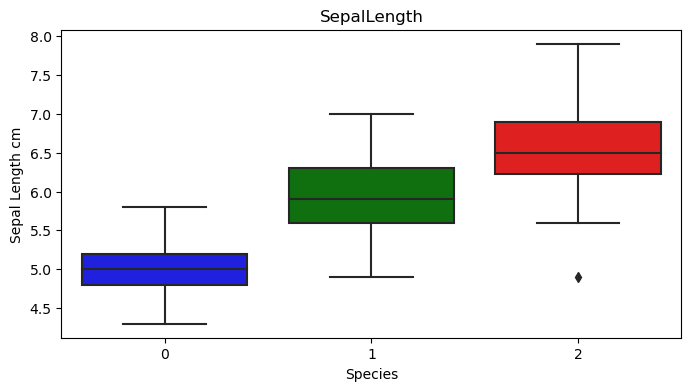

In [29]:
plt.figure(figsize=(8,4))
sns.set_style=("white")

#Create a boxplot 
sns.boxplot(data=iris_data, x='species', y='sepal length (cm)', palette=['blue','green','red'])

plt.title('SepalLength')
plt.xlabel('Species')
plt.ylabel('Sepal Length cm')
plt.show()

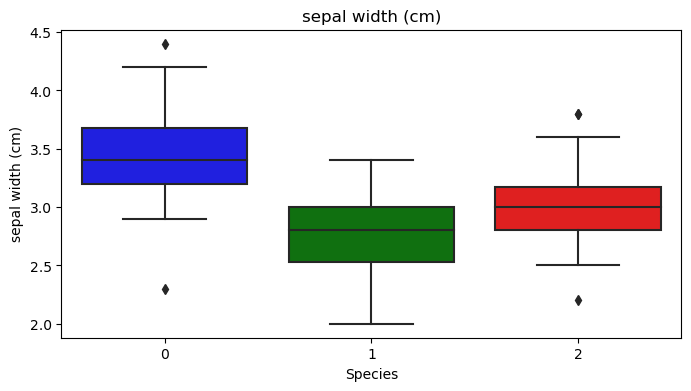

In [30]:
plt.figure(figsize=(8,4))
sns.set_style=("white")

#Create a boxplot 
sns.boxplot(data=iris_data, x='species', y='sepal width (cm)', palette=['blue','green','red'])

plt.title('sepal width (cm)')
plt.xlabel('Species')
plt.ylabel('sepal width (cm)')
plt.show()

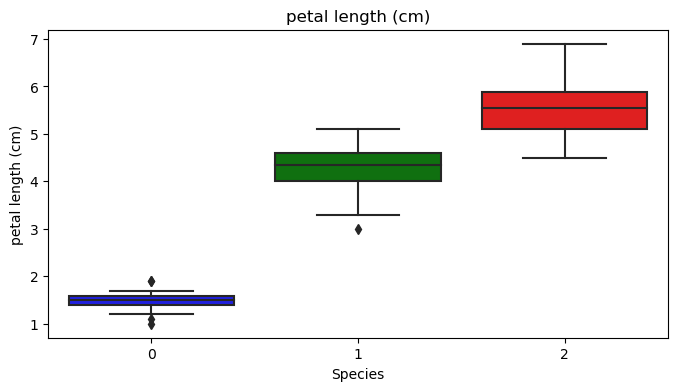

In [31]:
plt.figure(figsize=(8,4))
sns.set_style=("white")

#Create a boxplot 
sns.boxplot(data=iris_data, x='species', y='petal length (cm)', palette=['blue','green','red'])

plt.title('petal length (cm)')
plt.xlabel('Species')
plt.ylabel('petal length (cm)')
plt.show()

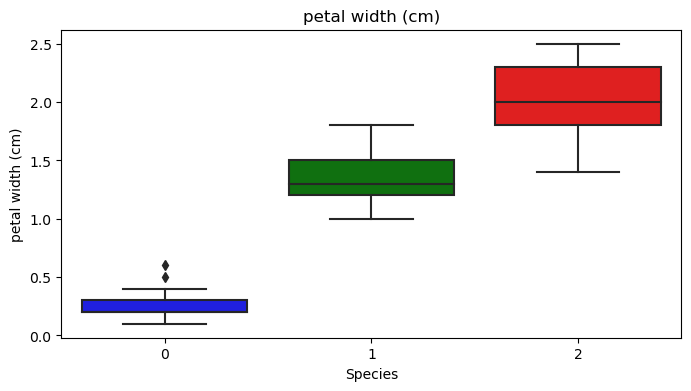

In [32]:
plt.figure(figsize=(8,4))
sns.set_style=("white")

#Create a boxplot 
sns.boxplot(data=iris_data, x='species', y='petal width (cm)', palette=['blue','green','red'])

plt.title('petal width (cm)')
plt.xlabel('Species')
plt.ylabel('petal width (cm)')
plt.show()

In [34]:
iris_data.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [35]:
X = iris_data.drop(['species'],axis=1)
y = iris_data['species']

In [37]:
#scaling only area columns
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_scaled = pd.DataFrame(columns=X.columns, data= X_scaled)
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [38]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [49]:
test_plant = {'sepal length (cm)' :10,
               'sepal width (cm)' :5.4, 
               'petal length (cm)': 3.4,
               'petal width (cm)' : 6.9
             }
plant_df = pd.DataFrame([test_plant])
plant_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,10,5.4,3.4,6.9


In [50]:
model.predict(plant_df) #here 2 = virginica

array([2], dtype=int64)